In [65]:
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt 

from sklearn.neural_network import MLPClassifier # importul clasei 
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn import preprocessing

import numpy as np

In [66]:
def plot3d_data(X, y):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],'r'); 
    plt.show()

In [67]:
def plot3d_data_and_decision_function(X, y, W, b): 
    ax = plt.axes(projection='3d')
    # create x,y
    xx, yy = np.meshgrid(range(10), range(10))
    # calculate corresponding z
    # [x, y, z] * [coef1, coef2, coef3] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5) 
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],'r'); 
    plt.show()

In [68]:
# incarcarea datelor de antrenare
x = np.loadtxt('./data/3d-points/x_train.txt')
y = np.loadtxt('./data/3d-points/y_train.txt', 'int') 

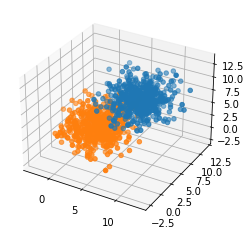

In [69]:
plot3d_data(x, y)

In [70]:
# incarcarea datelor de testare
x_test = np.loadtxt('./data/3d-points/x_test.txt')
y_test = np.loadtxt('./data/3d-points/y_test.txt', 'int') 


In [87]:
def train(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    acc_train = model.score(x_train, y_train)
    acc_test = model.score(x_test, y_test)
    
    print("Acuratete pe train {}".format(acc_train))
    print("Acuratete pe test {}".format(acc_test))
    # print(model.coef_)
    # print(model.intercept_)
    # print(model.n_iter_)

In [88]:
perceptron_model = Perceptron(eta0 = 0.1, tol = 1e-5)
train(perceptron_model, x, x_test, y, y_test)

Acuratete pe train 0.881
Acuratete pe test 0.905


In [89]:
X_train = np.loadtxt('./data/MNIST/train_images.txt')
Y_train = np.loadtxt('./data/MNIST/train_labels.txt')
X_test = np.loadtxt('./data/MNIST/test_images.txt')
Y_test = np.loadtxt('./data/MNIST/test_labels.txt')

In [90]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), learning_rate_init=0.01, momentum=0.8, max_iter=2000, alpha=0.005)
train(mlp_model, X_train, X_test, Y_train, Y_test)

Acuratete pe train 1.0
Acuratete pe test 0.896
